
# Projet 4 : étude des ventes de cette année de l'entreprise (analyse)

Dans ce document, nous allons étudier les ventes de l'année de l'entreprise en essayant de détailler un maximum nos démarches et en les rendant le plus simple à comprendre possible, afin de délivrer des informations claires et utiles.

## Sommaire

#### Perte de CA durant l'année
Avant de commencer notre étude en détails après un survole des données nous nous somme retrouver à un problème sur le CA que nous allons détailler dans cette partie

- [Perte de CA, Détection et Actions](#Perte-de-CA)


#### Dans un premier temps nous nous pencherons sur l'étude des clients

- [Étude du portefeuille client](#Le-portefeuille-client)
- [Étude des acheteurs](#Les-acheteurs)
- [Étude des dépenses des clients](#Etude-des-depenses-des-clients)

#### Ensuite nous observerons les produits

- [Étude du catalogue de produits](#Le-catalogue)
- [Étude des ventes de l'année](#Etude-des-produits-acheter)


#### Nous nous intéresserons a l'étude des paniers

- [Etude des paniers](#Etude-des-paniers)


#### Finalement nous étudierons de possible corrélation entre les différentes données

- [Sex et catégorie](#Correlation:-Sexes-Catégories)
- [Ages et montant total d'achat](#Correlation:-Ages-et-montant-total-d'achat)
- [Age et fréquence d'achat](#Correlation:-Age-et-fréquence-d'achat)
- [Age et nombre de produits moyen acheté](#Correlation:-Age-et-nombre-de-produits-moyen-acheté)
- [Age et categories acheté](#Correlation:-Age-et-categories-acheté)





In [1]:

#Import des différentes Librairie

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as st
import numpy as np

plt.style.use('seaborn-deep')
%matplotlib inline

#Chemin du dossier pour les images de graph
dossierImg = "./image_Graph/"


In [2]:

#Import des données
cus = pd.read_csv("data/customer_formate.csv")
pro = pd.read_csv("data/product_formate.csv")
tra = pd.read_csv("data/transaction_formate.csv",parse_dates=[1])


### Presentation des données

In [3]:
cus.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
pro.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
tra.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242



Pour plus de simplicité, nous allons ajouter une colonne avec l'âge de chaque personne en plus de leur date de naissance. Le tout sera plus lisible par la suite.


In [6]:
date = dt.datetime.now()

cus['age'] = date.year - cus['birth']

cus.head()

,client_id,sex,birth,age
0,c_4410,f,1967,53
1,c_7839,f,1975,45
2,c_1699,f,1984,36
3,c_5961,f,1962,58
4,c_5320,m,1943,77


### Création d'un DataFrame pour l'étude des transactions


Pour l'étude sur les dépenses et transaction de nos clients, nous créerons un nouveau tableau regroupant pour chaque transaction les informations du client et de l'article concerner.

In [7]:

tab_transactionsComplete = pd.DataFrame(tra)
tab_transactionsComplete = pd.merge(tab_transactionsComplete, pro, left_on='id_prod', right_on='id_prod', left_index=True, right_index=False, how='left')
tab_transactionsComplete = pd.merge(tab_transactionsComplete, cus, left_on='client_id', right_on='client_id', left_index=False, right_index=False, how='left')
tab_transactionsComplete.head()


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,43
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,20
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,41
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,57
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,40


### Perte de CA


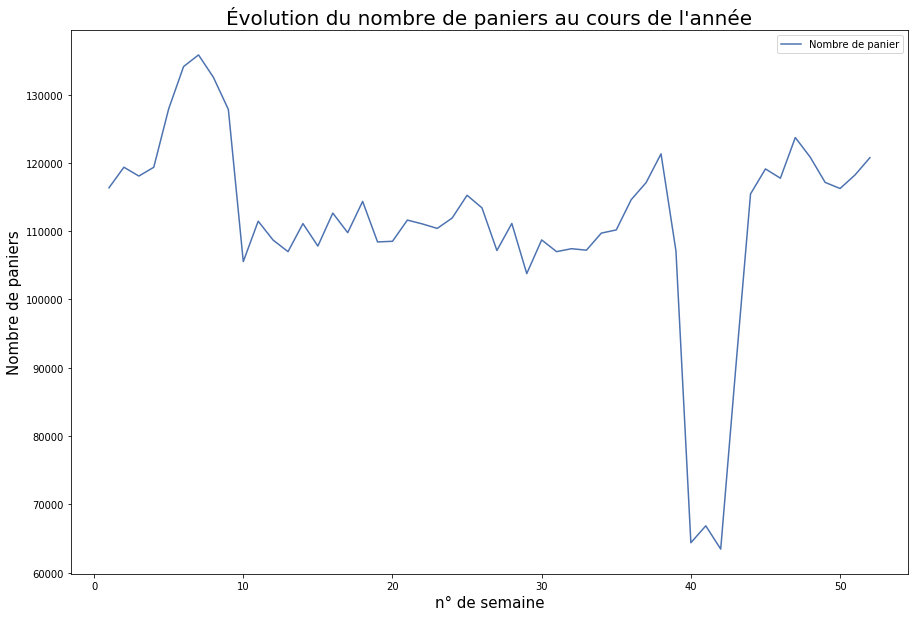

In [8]:

#Étude du nombre de paniers au cours du temp(semaine)

panier_parSemaine = pd.pivot_table(tab_transactionsComplete,values='price', index=tab_transactionsComplete.date.dt.week, aggfunc='sum')
plt.figure(figsize=(15,10))
plt.plot(panier_parSemaine, label= "Nombre de panier")
plt.title("Évolution du nombre de paniers au cours de l'année",fontsize=20)
plt.ylabel("Nombre de paniers",fontsize=15)
plt.xlabel("n° de semaine",fontsize=15)
plt.legend()
plt.savefig(dossierImg + "graph1.png")
plt.show()



Avec la création de notre nouveau tableau, nous avons pu avoir une vision globale des dépenses de nos clients (notre Chiffre d'affaires), et nous avons trouver une anomalie : ce dernier subit un fort recule aux alentours de la quarantième semaine soit environs octobre.


#### Étude plus approfondi

Dans la prochaine partie, j'ai regardé plus en profondeur d'où pouvait venir de telle résultat.


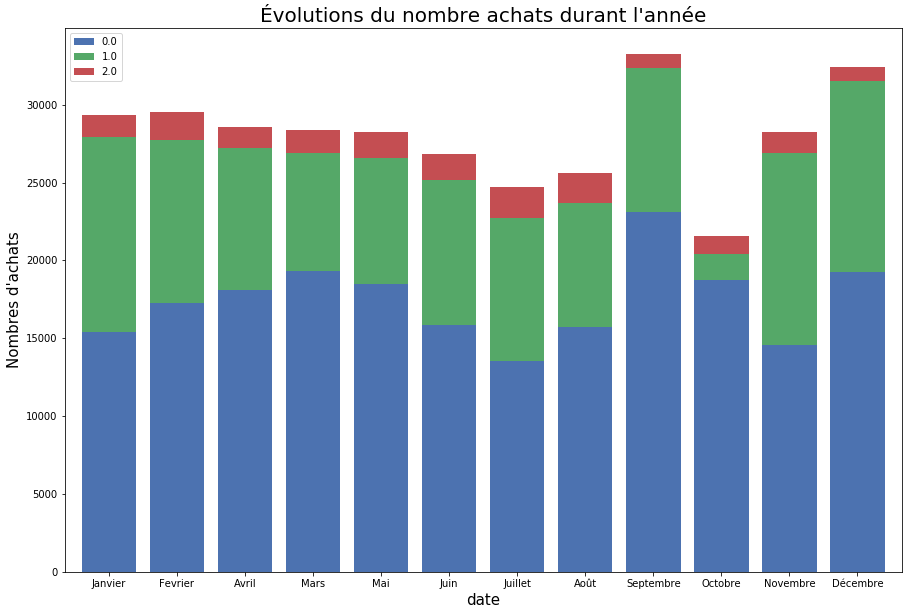

In [9]:

#Anciennement "t"
tab_nombreProdTime = pd.pivot_table(tab_transactionsComplete, values='id_prod', index= [tab_transactionsComplete.date.dt.month], columns='categ', aggfunc='count')
tab_nombreProdTime = tab_nombreProdTime.reset_index()

tab_nombreProdTime[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))
plt.xlabel('date',fontsize=15)
plt.ylabel("Nombres d'achats",fontsize=15)
plt.title("Évolutions du nombre achats durant l'année",fontsize=20)
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph2.png")
plt.show()



Ce graphe nous montre clairement un changement soudain dans la tendance d'achats de nos clients. On peut voir une très forte diminution des ventes des produits de catégorie 1. Regardons les chiffres.


In [10]:

#Nombres d'achats par catégories durant janvier
tab_nombreProdTime[tab_nombreProdTime['date'] == 1]


categ,date,0.0,1.0,2.0
0,1,15381,12560,1370


In [11]:

#Nombres d'achats par catégories durant Octobre
tab_nombreProdTime[tab_nombreProdTime['date'] == 10]


categ,date,0.0,1.0,2.0
9,10,18751,1666,1160


In [12]:

#Nombres d'achats moyens pour la catégorie 1 durant l'année
tab_nombreProdTime[1].mean()


9144.583333333334


Les chiffres vont dans notre sens. Nous savons donc que les ventes des objets de catégorie 1 diminue, mais est cela qui impacte tant notre CA ?


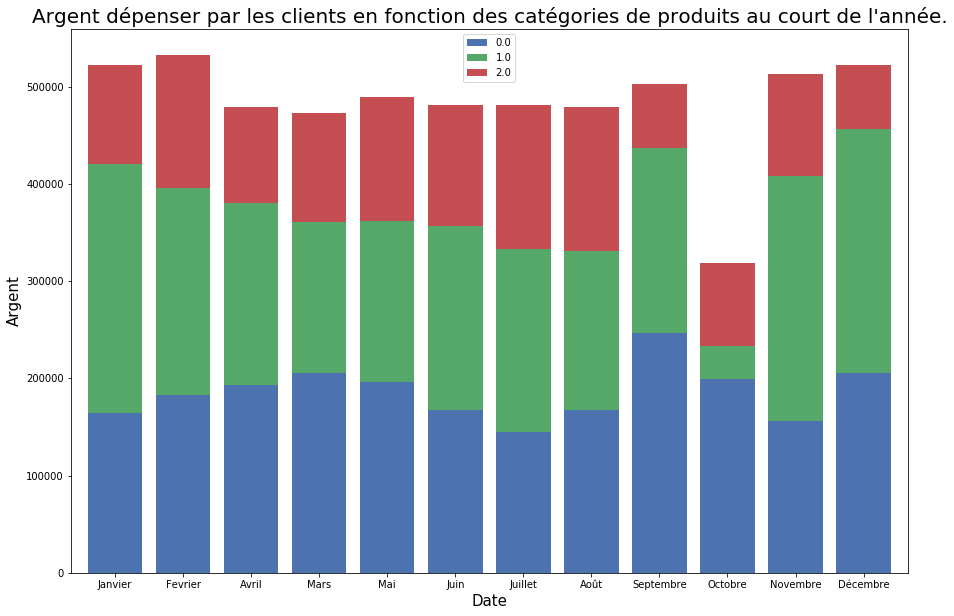

In [13]:

#Anciennement "y"
tab_gainparCategTime = pd.pivot_table(tab_transactionsComplete, values='price', index= [tab_transactionsComplete.date.dt.month], columns='categ', aggfunc='sum')
tab_gainparCategTime = tab_gainparCategTime.reset_index()

tab_gainparCategTime[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))
plt.xlabel('Date',fontsize=15)
plt.ylabel("Argent",fontsize=15)
plt.title("Argent dépenser par les clients en fonction des catégories de produits au court de l'année.",fontsize=20)
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph3.png")

plt.show()


L'argent dépensé par nos clients concorde avec le nombre de produits vendu.

In [14]:

#Jours où les produits de catégorie 1 sont vendu
tab_transactionsComplete[(tab_transactionsComplete.date.dt.month == 10) & (tab_transactionsComplete.categ == 1)].date.dt.day.sort_values().unique()


array([ 1, 28, 29, 30, 31])


On voit que durant le mois d'octobre les produits de catégorie n°1 ne sont acheter que sur 5 jours. (1,28,29,30,31)


In [15]:

#Produits sans prix
tab_transactionsComplete[tab_transactionsComplete.price.isna()]


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972,48
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,m,1973,47
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,f,1975,45
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,f,1982,38
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,m,1988,32
...,...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN,f,1979,41
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN,f,1983,37
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN,f,1984,36
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN,f,1973,47



Nous avons également remarqué qu'un produits ne possédait ni prix ni catégorie, mais qu'il étais tout de même utiliser lors de transactions.


In [16]:

tab_transactionsComplete[tab_transactionsComplete.price.isna()].id_prod.unique()


array(['0_2245'], dtype=object)


Pour résumer ce que nous avons pour le moment, il y a un produit dans notre base de données qui n'appartient a aucune catégorie et qui n'a pas de prix.

Les 103 transactions effectuées avec ce produit ne sont donc pas prix en compte dans notre calcul du chiffre d'affaire.

Ce produit pourrait donc expliquer la baisse en octobre.


In [17]:

print ("La marge de différence est de {} € à {} € sur le chiffre d'affaire.".
       format(tab_transactionsComplete[tab_transactionsComplete.categ == 0].price.min() * len(tab_transactionsComplete[tab_transactionsComplete.price.isna()]),
              tab_transactionsComplete[tab_transactionsComplete.categ == 0].price.max() * len(tab_transactionsComplete[tab_transactionsComplete.price.isna()])
             )
      )


La marge de différence est de 63.86 € à 4221.97 € sur le chiffre d'affaire.


In [18]:

liste = tab_transactionsComplete[tab_transactionsComplete.price.isna()].date.dt.month
compte = {}.fromkeys(set(liste),0)

for valeur in liste:
    compte[valeur] += 1

compte

{1: 5, 2: 11, 3: 9, 4: 14, 5: 8, 6: 7, 7: 4, 8: 9, 9: 12, 10: 7, 11: 10, 12: 7}


On peut voir que le produit est présent sur différents mois, nous allons tout de même le corriger.


### Imputation des données

L'id du produit nous indique ca catégorie. Tant qu'au prix, nous allons prendre la moyenne de cette catégorie

In [19]:

prixMoyenAvantModif = tab_transactionsComplete[tab_transactionsComplete.categ==0].price.mean()

tab_transactionsComplete.loc[tab_transactionsComplete.price.isna(),'price'] = prixMoyenAvantModif
tab_transactionsComplete.loc[tab_transactionsComplete.categ.isna(),'categ'] = 0

tab_transactionsComplete[tab_transactionsComplete.id_prod == '0_2245'].head()


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,10.646828,0.0,m,1972,48
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,10.646828,0.0,m,1973,47
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,10.646828,0.0,f,1975,45
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,10.646828,0.0,f,1982,38
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,10.646828,0.0,m,1988,32


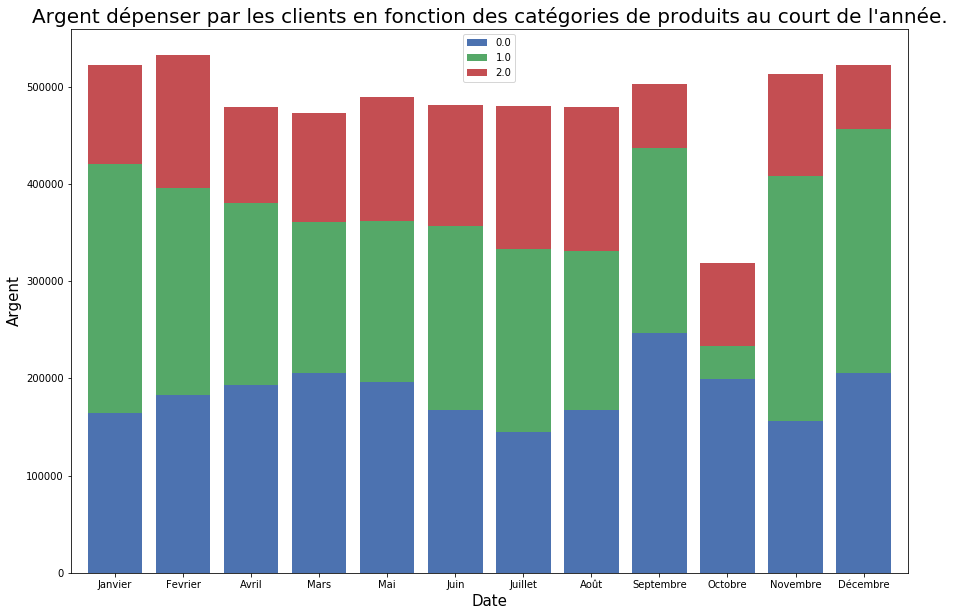

In [20]:

#Anciennement "y"
tab_gainparCategTime_corrigerProdManquant = pd.pivot_table(tab_transactionsComplete, values='price', index= [tab_transactionsComplete.date.dt.month], columns='categ', aggfunc='sum')
tab_gainparCategTime_corrigerProdManquant = tab_gainparCategTime_corrigerProdManquant.reset_index()

tab_gainparCategTime_corrigerProdManquant[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))

plt.xlabel('Date',fontsize=15)
plt.ylabel("Argent",fontsize=15)
plt.title("Argent dépenser par les clients en fonction des catégories de produits au court de l'année.",fontsize=20)
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph4.png")

plt.show()


Il semble que la modification de ce produits n'explique pas tout.

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------


# Etude des clients

Dans cette section nous allons etudier la repartition de l'age et du sexe des clients issu du portefeuille clients mais egalement des transaction au cours de l'année.

### Le portefeuille client

Pour cette etude nous allons nous concentrer sur les clients du fichier _cus_

In [21]:

nb_client = cus.client_id.value_counts().sum()
nb_persoParSex = cus.sex.value_counts()
nb_persoParAnnee = cus['age'].value_counts()
age_moyen = cus['age'].mean()
age_median = cus['age'].median()
age_modal = cus['age'].mode()[0]
annee_min = cus['age'].min()
annee_max = cus['age'].max()
variance_age = cus['age'].var()
ecarttype_age = cus['age'].std()


In [22]:
print("age moyen :{} ans \n un ecart-type de {}, \n l'age median est de {} ans \n age modale a {} ans \n fourchette d'age de {} ans a {} ans"
      .format("%.2f" % age_moyen, 
              "%.2f" % ecarttype_age,
              int(age_median),
              age_modal,
              cus.age.min(),
              cus.age.max()))


age moyen :41.72 ans 
 un ecart-type de 16.92, 
 l'age median est de 41 ans 
 age modale a 16 ans 
 fourchette d'age de 16 ans a 91 ans


In [23]:
print("Nombre de femmes :{} \n Nombre d'homme : {} \nle tout pour un total de {} client differents "
      .format(nb_persoParSex['f'],nb_persoParSex['m'],nb_client))


Nombre de femmes :4490 
 Nombre d'homme : 4131 
le tout pour un total de 8621 client differents 


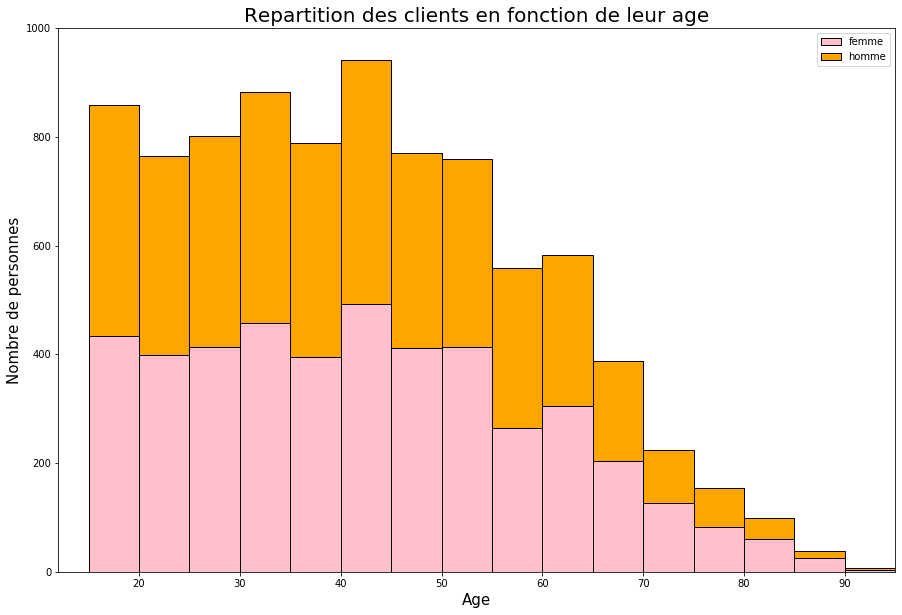

In [24]:

f = cus['age'][cus['sex']=='f']
m = cus['age'][cus['sex']=='m']

plt.figure(figsize=(15,10))

plt.hist([f, m],
         bins = range(10,100,5),
         color = ['pink', 'orange'],
         edgecolor = 'black',
         label = ['femme', 'homme'],
         histtype = 'barstacked')


plt.xlabel('Age',fontsize=15)
plt.ylabel('Nombre de personnes',fontsize=15)
plt.title('Repartition des clients en fonction de leur age',fontsize=20)
plt.axis([12, 95, 0, 1000])
plt.grid(False)
plt.legend()

plt.show()


### Les acheteurs 

Ici nous allons utiliser le fichier _data_ pour nous interresser au client qui on acheter quelquechose cette années

In [25]:
df_Acheteur = tab_transactionsComplete.copy()
df_Acheteur = df_Acheteur.drop(columns=(['id_prod', 'date', 'session_id', 'price', 'categ']))
df_Acheteur.head()

,client_id,sex,birth,age
0,c_4450,f,1977,43
1,c_277,f,2000,20
2,c_4270,f,1979,41
3,c_4597,m,1963,57
4,c_1242,f,1980,40


In [26]:
nb_client_acheteur = df_Acheteur.client_id.value_counts().sum()
nb_persoParSex_acheteur = df_Acheteur.sex.value_counts()
nb_persoParAnnee_acheteur = df_Acheteur['age'].value_counts()
age_moyen_acheteur = df_Acheteur['age'].mean()
age_median_acheteur = df_Acheteur['age'].median()
age_modal_acheteur = df_Acheteur['age'].mode()[0]
annee_min_acheteur = df_Acheteur['age'].min()
annee_max_acheteur = df_Acheteur['age'].max()
variance_age_acheteur = df_Acheteur['age'].var()
ecarttype_age_acheteur = df_Acheteur['age'].std()


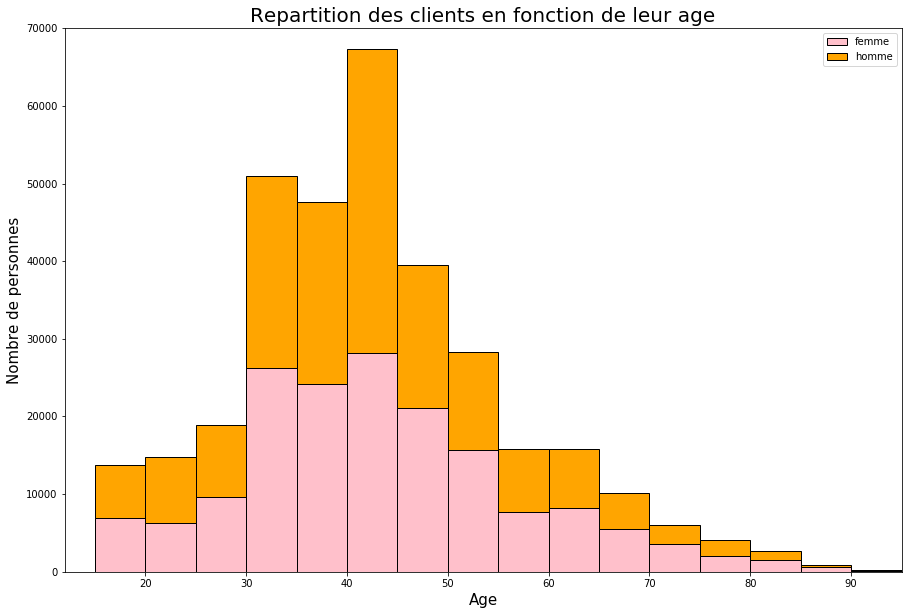

In [27]:


f = df_Acheteur['age'][df_Acheteur['sex']=='f']
m = df_Acheteur['age'][df_Acheteur['sex']=='m']

plt.figure(figsize=(15,10))

plt.hist([f, m],
         bins = range(10,100,5),
         color = ['pink', 'orange'],
         edgecolor = 'black',
         label = ['femme', 'homme'],
         histtype = 'barstacked')


plt.xlabel('Age',fontsize=15)
plt.ylabel('Nombre de personnes',fontsize=15)
plt.title('Repartition des clients en fonction de leur age',fontsize=20)
plt.axis([12, 95, 0, 70000])
plt.grid(False)
plt.legend()

plt.show()


In [28]:
print("age moyen :{} ans \n un ecart-type de {}, \n l'age median est de {} ans \n age modale a {} ans \n fourchette d'age de {} ans a {} ans"
      .format("%.2f" % age_moyen_acheteur, 
              "%.2f" % ecarttype_age_acheteur,
              int(age_median_acheteur),
              age_modal_acheteur,
              df_Acheteur.age.min(),
              df_Acheteur.age.max()))


age moyen :42.18 ans 
 un ecart-type de 13.52, 
 l'age median est de 40 ans 
 age modale a 40 ans 
 fourchette d'age de 16 ans a 91 ans


In [29]:
print("Nombre de femmes :{} \n Nombre d'homme : {} \nle tout pour un total de {} acheteurs "
      .format(nb_persoParSex_acheteur['f'],nb_persoParSex_acheteur['m'],nb_client_acheteur))


Nombre de femmes :167575 
 Nombre d'homme : 169241 
le tout pour un total de 336816 acheteurs 


ici ce que l'ont peut retenir ces que les clients du portefeuille client ne sont pas representatif des acheteur. Un exemple simple, nous avons une majoriter de femme dans le portefeuille et une majoriter d'homme chez les acheteurs. 

### Etude des depenses des clients 

Ici nous allons observer les depenses des nos clients acheteur durant l'années

In [30]:
depenseParClient = pd.pivot_table(tab_transactionsComplete, values='price', index='client_id',aggfunc='sum')
depenseParClient = depenseParClient.reset_index()

client_depenseMoyenne = depenseParClient.price.mean()
client_depenseMedian = depenseParClient.price.median()
ecarttype_depenseClient = depenseParClient.price.std()
variance_depenseClient = depenseParClient.price.var()


In [31]:
print("Les clients on en moyenne dépenser {}€\n la dépense médiane a {}€\n le tout avec un écart-type de {}"
      .format("%.2f" % client_depenseMoyenne, "%.2f" % client_depenseMedian, "%.2f" % ecarttype_depenseClient))


Les clients on en moyenne dépenser 674.15€
 la dépense médiane a 501.31€
 le tout avec un écart-type de 2565.99


In [32]:
depenseParClient.sort_values(by='price',ascending=False).head(10)


,client_id,price
677,c_1609,162007.340000
4388,c_4958,144257.210000
6337,c_6714,73218.633656
2724,c_3454,54464.213656
7715,c_7959,2564.250000
7791,c_8026,2548.316828
3870,c_4491,2540.530000
1268,c_2140,2527.010000
8195,c_8392,2515.980000
7120,c_7421,2511.980000


 Voici ci dessus la liste des 10 clients les plus depensier. On peut clairement voire que nous avons de tres gros 
 contributeur, notament les 4 premieres personnes

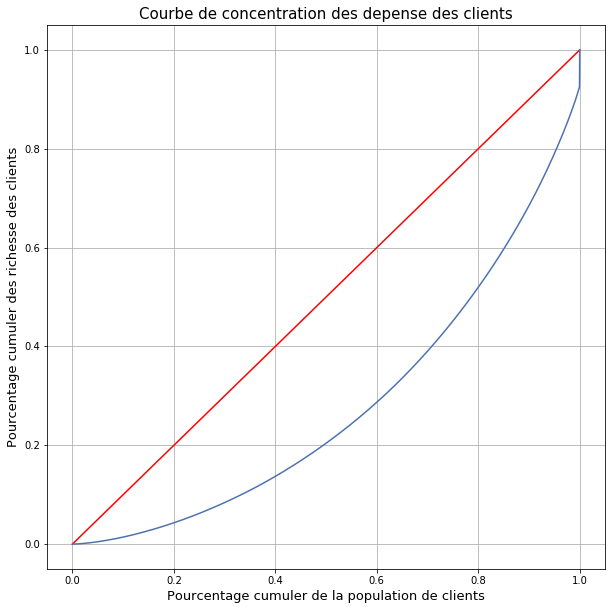

In [33]:
c = depenseParClient.copy()
c = c.sort_values(by='price')
c = c.reset_index()
c = c.drop(columns='index')


dep = c['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de concentration des depense des clients', fontsize=15)
plt.ylabel('Pourcentage cumuler des richesse des clients', fontsize=13)
plt.xlabel('Pourcentage cumuler de la population de clients', fontsize=13)
plt.grid(True)
plt.show()

In [34]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.4398980967377766

La forme etrange de la courbe a la fin indique bien que la repartition au seins des clients est inegale. On voit ici que moins de 1% des clients represente un peu moins de 10% du ca de l'entreprise.

In [35]:
depenseParClient.sort_values(by='price',ascending=False)[:5].price.sum() * 100 / depenseParClient.price.sum()

7.529081795569122


Nous avons ci dessus la preuvent par calcule que les 5 clients les plus depensier, qui ne represente que 0.001% du portefeuille clients apport 7% du CA a l'entreprise

### Depense en fonction de l'age

Ici nous allons voire les depense des clients en fonction de leur age.

In [36]:
achatParAge = pd.pivot_table(tab_transactionsComplete, values='price',index='age', aggfunc='sum' )
achatParAge = achatParAge.reset_index()

tranche_age = 5
test = np.arange(15,100,tranche_age)
groupes_age=[]

for ind, nb in enumerate(test):
    a=0
    a = achatParAge[(achatParAge['age'] >= nb) & (achatParAge['age'] < nb+tranche_age)].sum()
    d={
        'age':'{}~{}'.format(nb, nb+tranche_age),
        'price':a[1].round(3)
    }
    groupes_age.append(d)
    
df_trancheAge = pd.DataFrame(groupes_age)

#On ajoute cette petite ligne pour enlever le derniere elements dont nous n'avons pas besoin
df_trancheAge = df_trancheAge[:-1]


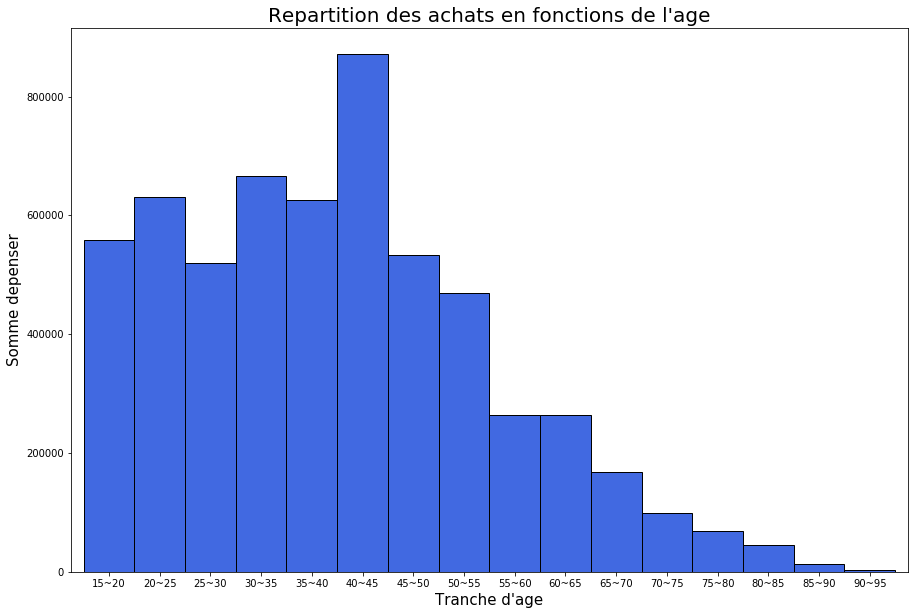

In [37]:

df_trancheAge.plot.bar('age','price',
                       figsize=(15,10),
                       rot =0,
                       width = 1,
                       edgecolor = 'black',
                       color='royalblue',
                      legend=None)

plt.xlabel("Tranche d'age",fontsize=15)
plt.ylabel("Somme depenser",fontsize=15)
plt.title("Repartition des achats en fonctions de l'age",fontsize=20)
plt.grid(False)
plt.show()


Nous avons si dessus la repartition des achats en fonctions de l'age de nos clients, il est notable de voire qu'une tranche d'age sort du lot

# Etude des produits 

Ici nous allons nous interresser a la repartions des prix des produits et nous etudirons les categories de ces derniers

### Le catalogue

ici nous etudirons le fichier _pro_ qui contient tout les article proposer sur le site.

In [38]:
nb_deProduit = pro.id_prod.value_counts().sum()
nb_deProduitParCateg = pro.categ.value_counts()
prix_moyen = pro.price.mean()
prix_modale = pro.price.mode()[0]
prix_median = pro.price.median()
prix_min = pro.price.min()
prix_max =pro.price.max()
ecarttype_prix = pro.price.std()
variance_prix = pro.price.var()


In [39]:
print('Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits differents'
      .format(prix_max,prix_min,"%.2f" % prix_moyen, "%.2f" % ecarttype_prix, prix_median,prix_modale,nb_deProduit))

Le prix maximum est a 300.0 €
 le minimum est a 0.62€ 
 le prix moyen est a 21.86€ 
 avec un ecat-type de 29.85 
 le prix median est a 13.075€ 
 le modale a 4.99€, 
 il y a 3286 produits differents


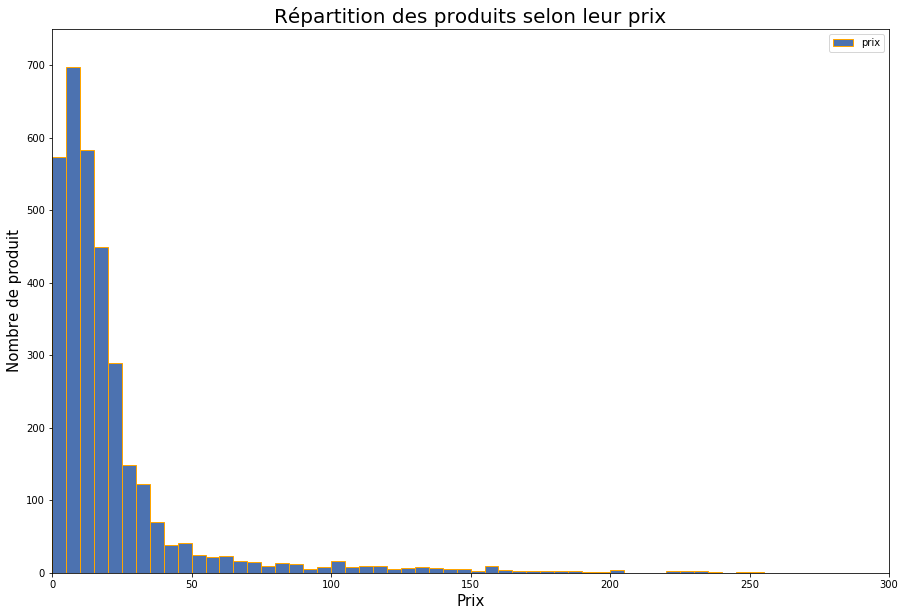

In [40]:
pro['price'].plot.hist(figsize=(15,10),bins = range(0,300,5) , edgecolor = 'orange', label='prix')
plt.xlabel('Prix',fontsize=15)
plt.ylabel('Nombre de produit',fontsize=15)
plt.title('Répartition des produits selon leur prix',fontsize=20)
plt.axis([0, 300, 0, 750])
plt.grid(False)
plt.legend()
plt.show()


Petite courbe de concentration pour bien marquer la repartition des produits

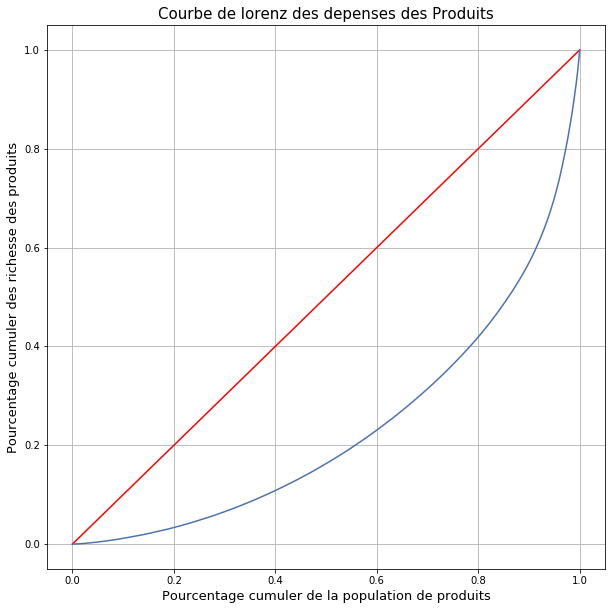

In [41]:
d = pro.copy()
d = d.sort_values(by='price')
d = d.reset_index()
d = d.drop(columns=['categ','index'])


dep = d['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de lorenz des depenses des Produits', fontsize=15)
plt.ylabel('Pourcentage cumuler des richesse des produits', fontsize=13)
plt.xlabel('Pourcentage cumuler de la population de produits', fontsize=13)
plt.grid(True)
plt.show()

In [42]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.5321753235061014

### Les categories

Penchons nous un peut plus sur les categories

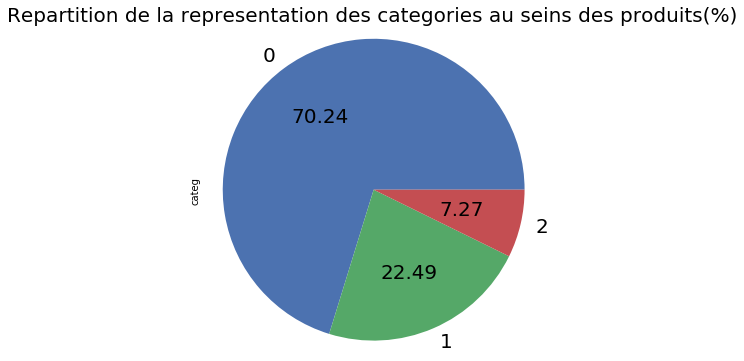

In [43]:
nb_deProduitParCateg.plot.pie(autopct='%.2f', figsize=(6,6), fontsize=20)
plt.title('Repartition de la representation des categories au seins des produits(%)', fontsize=20)
plt.axis('equal')
plt.show()


Pour poursuivre sur les categorie, voici le prix moyen de chaque categories, prix que nous avons utiliser deja precedement.

In [44]:
prixMoyenCateg = pd.pivot_table(tab_transactionsComplete, index='categ', values='price', aggfunc='mean')
prixMoyenCateg.round(3)

,price
categ,
0.0,10.647
1.0,20.480
2.0,75.175


la categorie 0 a un prix moyen de 10 euro la categorie 1 de 20 et la 2 de 75 euro (arondit a l'euro pres)

### Repartition par categories

Nous allons etudier la repartition des achats par categories au cours de l'année

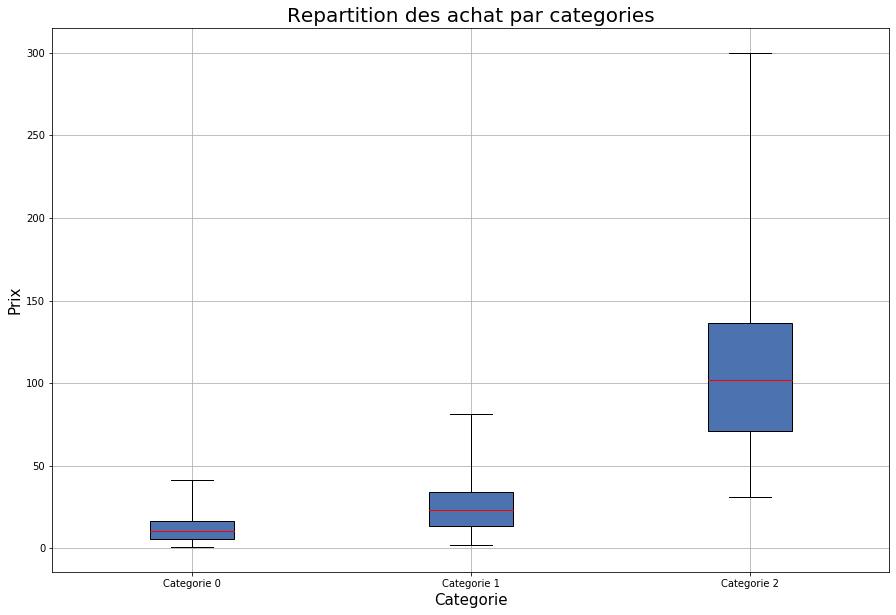

In [45]:
# ------------------------------------------------------------------------------------------

repParCateg_catalogue = pro.copy()

#creation de sous liste
prixCateg0 = repParCateg_catalogue[repParCateg_catalogue['categ'] == 0 ]['price']
prixCateg1 = repParCateg_catalogue[repParCateg_catalogue['categ'] == 1 ]['price']
prixCateg2 = repParCateg_catalogue[repParCateg_catalogue['categ'] == 2 ]['price']

#Taille de la figure
plt.figure(figsize=(15,10))

#Creation du boxplot
boxplotElements  = plt.boxplot([prixCateg0,prixCateg1,prixCateg2],
            whis = 'range',
           patch_artist=True)

#coloration de  la median
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(1)

#Details du graph
plt.gca().xaxis.set_ticklabels(['Categorie 0', 'Categorie 1', 'Categorie 2'])   
plt.ylabel('Prix', fontsize=15)
plt.xlabel('Categorie', fontsize=15)
plt.title('Repartition des achat par categories', fontsize=20)
plt.grid(True)
plt.show()

ici nous pouvons voire la repartition des prix de chaque categories

Passons ici les details des calcules habituel

In [46]:
#Categ0
nb_deProduit_categ0_catalogue = pro[pro.categ==0].id_prod.value_counts().sum()
nb_deProduitParCateg_categ0_catalogue = pro[pro.categ==0].categ.value_counts()
prix_moyen_categ0_catalogue = pro[pro.categ==0].price.mean()
prix_modale_categ0_catalogue = pro[pro.categ==0].price.mode()[0]
prix_median_categ0_catalogue = pro[pro.categ==0].price.median()
prix_min_categ0_catalogue = pro[pro.categ==0].price.min()
prix_max_categ0_catalogue = pro[pro.categ==0].price.max()
ecarttype_prix_categ0_catalogue = pro[pro.categ==0].price.std()
variance_prix_categ0_catalogue = pro[pro.categ==0].price.var()


#Categ1
nb_deProduit_categ1_catalogue = pro[pro.categ == 1].id_prod.value_counts().sum()
nb_deProduitParCateg_categ1_catalogue = pro[pro.categ == 1].categ.value_counts()
prix_moyen_categ1_catalogue = pro[pro.categ == 1].price.mean()
prix_modale_categ1_catalogue = pro[pro.categ == 1].price.mode()[0]
prix_median_categ1_catalogue = pro[pro.categ == 1].price.median()
prix_min_categ1_catalogue = pro[pro.categ == 1].price.min()
prix_max_categ1_catalogue = pro[pro.categ == 1].price.max()
ecarttype_prix_categ1_catalogue = pro[pro.categ == 1].price.std()
variance_prix_categ1_catalogue = pro[pro.categ == 1].price.var()


#Categ2
nb_deProduit_categ2_catalogue = pro[pro.categ == 2].id_prod.value_counts().sum()
nb_deProduitParCateg_categ2_catalogue = pro[pro.categ == 2].categ.value_counts()
prix_moyen_categ2_catalogue = pro[pro.categ == 2].price.mean()
prix_modale_categ2_catalogue = pro[pro.categ == 2].price.mode()[0]
prix_median_categ2_catalogue = pro[pro.categ == 2].price.median()
prix_min_categ2_catalogue = pro[pro.categ == 2].price.min()
prix_max_categ2_catalogue = pro[pro.categ == 2].price.max()
ecarttype_prix_categ2_catalogue = pro[pro.categ == 2].price.std()
variance_prix_categ2_catalogue = pro[pro.categ == 2].price.var()


In [47]:
print('Pour la categorie 0 \n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits differents'
      .format(prix_max_categ0_catalogue,
              prix_min_categ0_catalogue,
              "%.2f" % prix_moyen_categ0_catalogue,
              "%.2f" % ecarttype_prix_categ0_catalogue,
              prix_median_categ0_catalogue,
              prix_modale_categ0_catalogue,
              nb_deProduit_categ0_catalogue
             ))


Pour la categorie 0 
 Le prix maximum est a 40.99 €
 le minimum est a 0.62€ 
 le prix moyen est a 11.73€ 
 avec un ecat-type de 7.57 
 le prix median est a 10.32€ 
 le modale a 4.99€, 
 il y a 2308 produits differents


In [48]:
print('Pour la categorie 1 \n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits differents'
      .format(prix_max_categ1_catalogue,
              prix_min_categ1_catalogue,
              "%.2f" % prix_moyen_categ1_catalogue, 
              "%.2f" % ecarttype_prix_categ1_catalogue, 
              prix_median_categ1_catalogue,
              prix_modale_categ1_catalogue,
              nb_deProduit_categ1_catalogue))


Pour la categorie 1 
 Le prix maximum est a 80.99 €
 le minimum est a 2.0€ 
 le prix moyen est a 25.53€ 
 avec un ecat-type de 15.43 
 le prix median est a 22.99€ 
 le modale a 22.99€, 
 il y a 739 produits differents


In [49]:
print('Pour la categorie 2\n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits differents'
      .format(prix_max_categ2_catalogue,
              prix_min_categ2_catalogue,
              "%.2f" % prix_moyen_categ2_catalogue,
              "%.2f" % ecarttype_prix_categ2_catalogue,
              prix_median_categ2_catalogue,
              prix_modale_categ2_catalogue,
              nb_deProduit_categ2_catalogue))

Pour la categorie 2
 Le prix maximum est a 300.0 €
 le minimum est a 30.99€ 
 le prix moyen est a 108.35€ 
 avec un ecat-type de 49.56 
 le prix median est a 101.99€ 
 le modale a 50.99€, 
 il y a 239 produits differents


### Etude des produits acheter 

Ici nous allons nous interresser au produits acheter, a savoir leur repartition en fonction de leur prix ou encore la categorie la plus acheter.

In [50]:
df_ProduitVendu = tab_transactionsComplete.copy()
df_ProduitVendu = df_ProduitVendu.drop(columns=(['date', 'session_id', 'client_id', 'sex', 'birth', 'age']))
df_ProduitVendu.head()


,id_prod,price,categ
0,0_1483,4.99,0.0
1,2_226,65.75,2.0
2,1_374,10.71,1.0
3,0_2186,4.20,0.0
4,0_1351,8.99,0.0


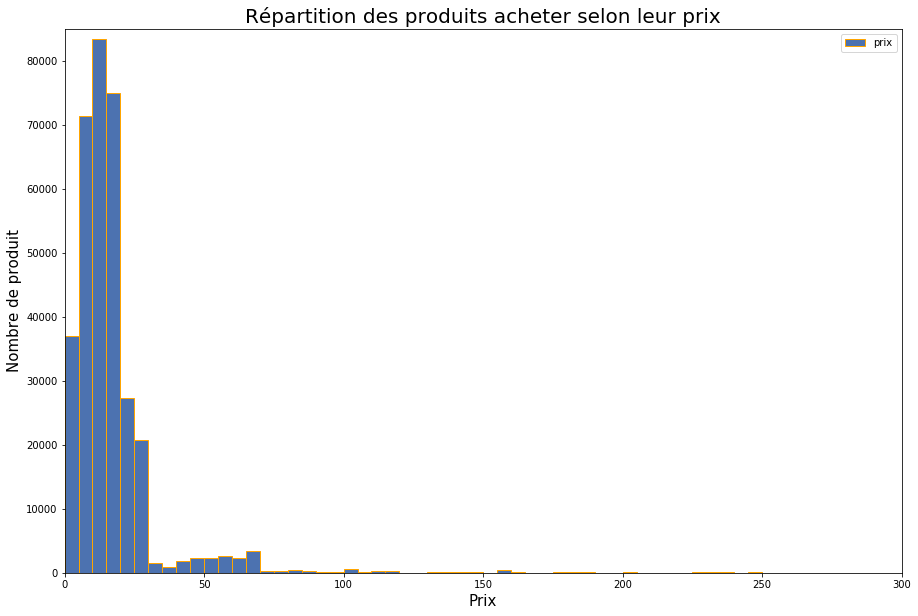

In [51]:
df_ProduitVendu['price'].plot.hist(figsize=(15,10),bins = range(0,300,5) , edgecolor = 'orange', label='prix')
plt.xlabel('Prix',fontsize=15)
plt.ylabel('Nombre de produit',fontsize=15)
plt.title('Répartition des produits acheter selon leur prix',fontsize=20)
plt.axis([0, 300, 0, 85000])
plt.grid(False)
plt.legend()
plt.show()

In [52]:
nb_deProduit_acheter = df_ProduitVendu.id_prod.value_counts().sum()
nb_deProduitParCateg_acheter = df_ProduitVendu.categ.value_counts()
prix_moyen_acheter = df_ProduitVendu.price.mean()
prix_modale_acheter = df_ProduitVendu.price.mode()[0]
prix_median_acheter = df_ProduitVendu.price.median()
prix_min_acheter = df_ProduitVendu.price.min()
prix_max_acheter =df_ProduitVendu.price.max()
ecarttype_prix_acheter = df_ProduitVendu.price.std()
variance_prix_acheter = df_ProduitVendu.price.var()


In [53]:
print('Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits acheter cette année'
      .format(prix_max_acheter,prix_min_acheter,"%.2f" % prix_moyen_acheter, "%.2f" % ecarttype_prix_acheter, prix_median_acheter,prix_modale_acheter,nb_deProduit_acheter))

Le prix maximum est a 300.0 €
 le minimum est a 0.62€ 
 le prix moyen est a 17.21€ 
 avec un ecat-type de 17.85 
 le prix median est a 13.9€ 
 le modale a 15.99€, 
 il y a 336816 produits acheter cette année


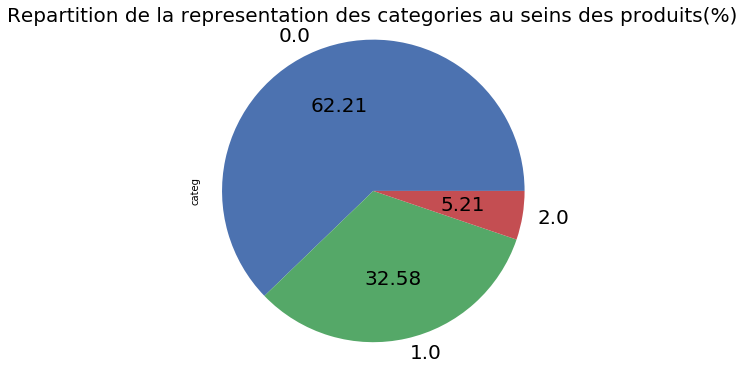

In [54]:
nb_deProduitParCateg_acheter.plot.pie(autopct='%.2f', figsize=(6,6), fontsize=20)
plt.title('Repartition de la representation des categories au seins des produits(%)', fontsize=20)
plt.axis('equal')
plt.show()

In [55]:
df_NbAchatParProduits = pd.pivot_table(tab_transactionsComplete, values='client_id', index='id_prod', aggfunc='count')
df_NbAchatParProduits.sort_values(by='client_id', ascending=False).head(10)

,client_id
id_prod,
1_369,1081
1_417,1062
1_498,1036
1_414,1027
1_425,1013
1_398,952
1_406,946
1_413,944
1_403,939


Voici la liste des 10 produits qui ce sont le mieux vendu

In [56]:
transaction_parProduit = df_ProduitVendu.id_prod.value_counts()
len(transaction_parProduit[transaction_parProduit <= 12]) * 100 / nb_deProduit

33.68837492391966

Ici nous pouvons voire que 33% du catalogue est vendu 12 fois ou moins dans l'année

### Repartition par categories

Nous allons etudier la repartition des achats par categories au cours de l'année

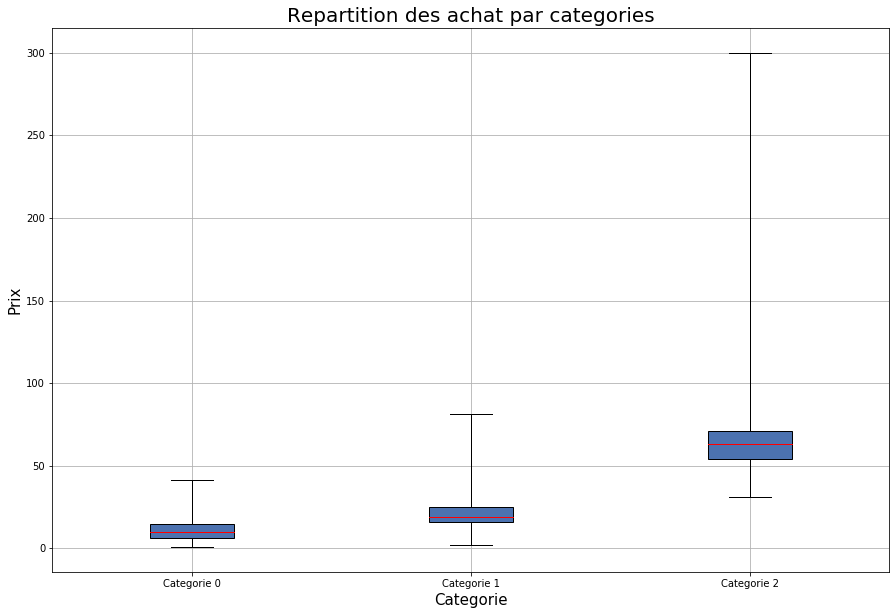

In [57]:
repParCateg = tab_transactionsComplete.copy()
repParCateg = repParCateg.drop(columns=['date','id_prod','session_id','client_id', 'birth', 'age', 'sex'])

#creation de sous liste
prixCateg0 = repParCateg[repParCateg['categ'] == 0 ]['price']
prixCateg1 = repParCateg[repParCateg['categ'] == 1 ]['price']
prixCateg2 = repParCateg[repParCateg['categ'] == 2 ]['price']

#Taille de la figure
plt.figure(figsize=(15,10))

#Creation du boxplot
boxplotElements  = plt.boxplot([prixCateg0,prixCateg1,prixCateg2],
            whis = 'range',
           patch_artist=True)

#coloration de  la median
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(1)

#Details du graph
plt.gca().xaxis.set_ticklabels(['Categorie 0', 'Categorie 1', 'Categorie 2'])   
plt.ylabel('Prix', fontsize=15)
plt.xlabel('Categorie', fontsize=15)
plt.title('Repartition des achat par categories', fontsize=20)
plt.grid(True)
plt.show()

ici nous pouvons voire la repartition des prix de chaque categories

Passons ici les details des calcules habituel

In [58]:
#Categ0
nb_deProduit_categ0 = tab_transactionsComplete[tab_transactionsComplete.categ==0].id_prod.value_counts().sum()
nb_deProduitParCateg_categ0 = tab_transactionsComplete[tab_transactionsComplete.categ==0].categ.value_counts()
prix_moyen_categ0 = tab_transactionsComplete[tab_transactionsComplete.categ==0].price.mean()
prix_modale_categ0 = tab_transactionsComplete[tab_transactionsComplete.categ==0].price.mode()[0]
prix_median_categ0 = tab_transactionsComplete[tab_transactionsComplete.categ==0].price.median()
prix_min_categ0 = tab_transactionsComplete[tab_transactionsComplete.categ==0].price.min()
prix_max_categ0 = tab_transactionsComplete[tab_transactionsComplete.categ==0].price.max()
ecarttype_prix_categ0 = tab_transactionsComplete[tab_transactionsComplete.categ==0].price.std()
variance_prix_categ0 = tab_transactionsComplete[tab_transactionsComplete.categ==0].price.var()


#Categ1
nb_deProduit_categ1 = tab_transactionsComplete[tab_transactionsComplete.categ == 1].id_prod.value_counts().sum()
nb_deProduitParCateg_categ1 = tab_transactionsComplete[tab_transactionsComplete.categ == 1].categ.value_counts()
prix_moyen_categ1 = tab_transactionsComplete[tab_transactionsComplete.categ == 1].price.mean()
prix_modale_categ1 = tab_transactionsComplete[tab_transactionsComplete.categ == 1].price.mode()[0]
prix_median_categ1 = tab_transactionsComplete[tab_transactionsComplete.categ == 1].price.median()
prix_min_categ1 = tab_transactionsComplete[tab_transactionsComplete.categ == 1].price.min()
prix_max_categ1 = tab_transactionsComplete[tab_transactionsComplete.categ == 1].price.max()
ecarttype_prix_categ1 = tab_transactionsComplete[tab_transactionsComplete.categ == 1].price.std()
variance_prix_categ1 = tab_transactionsComplete[tab_transactionsComplete.categ == 1].price.var()


#Categ2
nb_deProduit_categ2 = tab_transactionsComplete[tab_transactionsComplete.categ == 2].id_prod.value_counts().sum()
nb_deProduitParCateg_categ2 = tab_transactionsComplete[tab_transactionsComplete.categ == 2].categ.value_counts()
prix_moyen_categ2 = tab_transactionsComplete[tab_transactionsComplete.categ == 2].price.mean()
prix_modale_categ2 = tab_transactionsComplete[tab_transactionsComplete.categ == 2].price.mode()[0]
prix_median_categ2 = tab_transactionsComplete[tab_transactionsComplete.categ == 2].price.median()
prix_min_categ2 = tab_transactionsComplete[tab_transactionsComplete.categ == 2].price.min()
prix_max_categ2 = tab_transactionsComplete[tab_transactionsComplete.categ == 2].price.max()
ecarttype_prix_categ2 = tab_transactionsComplete[tab_transactionsComplete.categ == 2].price.std()
variance_prix_categ2 = tab_transactionsComplete[tab_transactionsComplete.categ == 2].price.var()

In [59]:
print('Pour la categorie 0 \n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits vendu'
      .format(prix_max_categ0,prix_min_categ0,"%.2f" % prix_moyen_categ0, "%.2f" % ecarttype_prix_categ0, prix_median_categ0,prix_modale_categ0,nb_deProduit_categ0))


Pour la categorie 0 
 Le prix maximum est a 40.99 €
 le minimum est a 0.62€ 
 le prix moyen est a 10.65€ 
 avec un ecat-type de 4.93 
 le prix median est a 9.99€ 
 le modale a 4.99€, 
 il y a 209529 produits vendu


In [60]:
print('Pour la categorie 1 \n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits vendu'
      .format(prix_max_categ1,prix_min_categ1,"%.2f" % prix_moyen_categ1, "%.2f" % ecarttype_prix_categ1, prix_median_categ1,prix_modale_categ1,nb_deProduit_categ1))


Pour la categorie 1 
 Le prix maximum est a 80.99 €
 le minimum est a 2.0€ 
 le prix moyen est a 20.48€ 
 avec un ecat-type de 7.57 
 le prix median est a 19.08€ 
 le modale a 15.99€, 
 il y a 109735 produits vendu


In [61]:
print('Pour la categorie 2\n Le prix maximum est a {} €\n le minimum est a {}€ \n le prix moyen est a {}€ \n avec un ecat-type de {} \n le prix median est a {}€ \n le modale a {}€, \n il y a {} produits vendu'
      .format(prix_max_categ2,prix_min_categ2,"%.2f" % prix_moyen_categ2, "%.2f" % ecarttype_prix_categ2, prix_median_categ2,prix_modale_categ2,nb_deProduit_categ2))

Pour la categorie 2
 Le prix maximum est a 300.0 €
 le minimum est a 30.99€ 
 le prix moyen est a 75.17€ 
 avec un ecat-type de 39.08 
 le prix median est a 62.83€ 
 le modale a 68.99€, 
 il y a 17552 produits vendu


### repartition des achats de chaque categorie par tranche d'age 

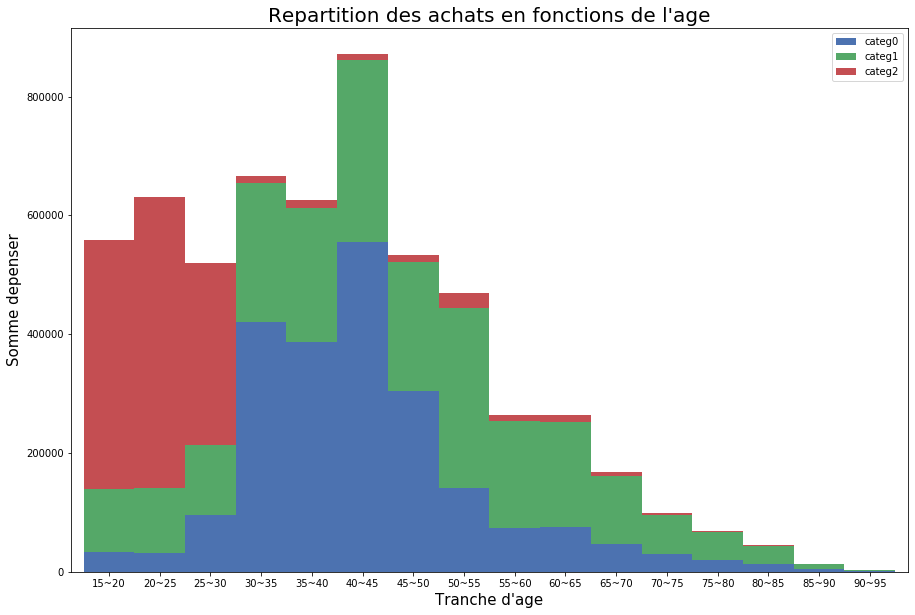

In [62]:
repAchatAgeCateg = pd.pivot_table(tab_transactionsComplete, values='price',index='age', columns='categ', aggfunc='sum' )
repAchatAgeCateg = repAchatAgeCateg.reset_index()
repAchatAgeCateg.head()   
taille_classe = 5.0 
groupes = []



tranches = np.arange(15,100,tranche_age)

for ind, tr in enumerate(tranches):
        a = 0
        a = repAchatAgeCateg[(repAchatAgeCateg['age'] >= tr) & (repAchatAgeCateg['age'] < tr+taille_classe)].sum()
        g={'age':'{}~{}'.format(tr, tr+tranche_age),
           'categ0':a[0],
           'categ1':a[1],
           'categ2':a[2]}
        groupes.append(g)

groupes = pd.DataFrame(groupes)
groupes = groupes.round(3)
#On ajoute cette petite ligne pour enlever le derniere elements dont nous n'avons pas besoin
groupes = groupes[:-1]


groupes[['categ0','categ1','categ2']].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=1)

plt.xticks(np.arange(0, 16, 1),(groupes.age))
plt.xlabel("Tranche d'age",fontsize=15)
plt.ylabel("Somme depenser",fontsize=15)
plt.title("Repartition des achats en fonctions de l'age",fontsize=20)
plt.grid(False)
plt.legend()

plt.show()


### Evolution du ca par categories 

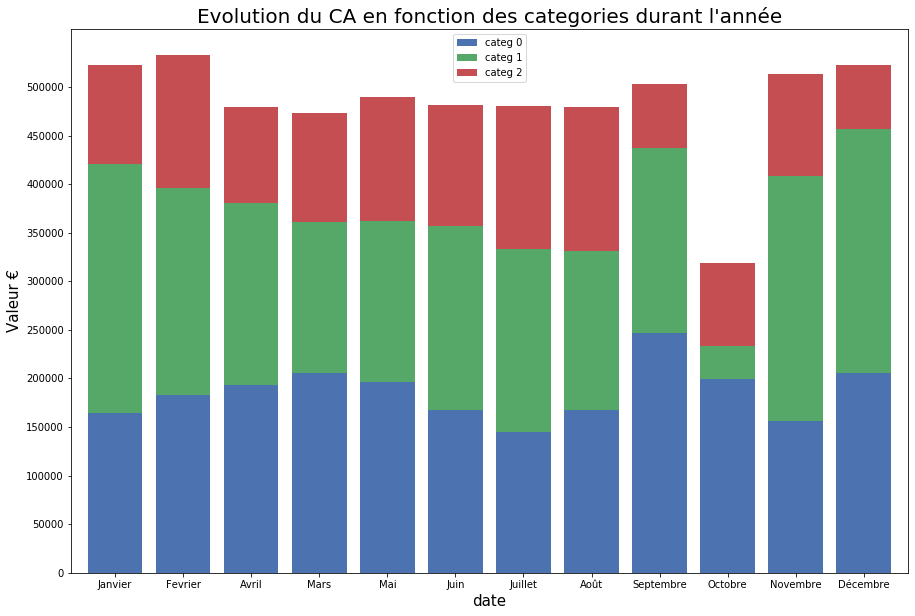

In [63]:
evoCACateg = pd.pivot_table(tab_transactionsComplete, values='price', index= tab_transactionsComplete.date.dt.month, columns='categ', aggfunc='sum')
evoCACateg = evoCACateg.reset_index()

evoCACateg[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=0.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))
plt.yticks(np.arange(0, 550000, 50000))
plt.xlabel('date',fontsize=15)
plt.ylabel("Valeur €",fontsize=15)
plt.title("Evolution du CA en fonction des categories durant l'année",fontsize=20)
plt.grid(False)
plt.legend(['categ 0','categ 1','categ 2'])
plt.show()

# Etude des paniers

Dans cette partie nous nous concentreront sur les paniers des client, nous observeront egalement leur evolutions tout au long de cette année, et ainsi nous pourrons sortir les periodes les plus populaire au pres des clients


In [64]:
toutPanierAnnee = pd.pivot_table(tab_transactionsComplete, values='price', index='session_id', aggfunc='sum')

panierMoyen = toutPanierAnnee.mean()
panierModale = toutPanierAnnee.mode()
panierMedian = toutPanierAnnee.median()
ecarttype_panier = toutPanierAnnee.std()[0]
variance_panier = toutPanierAnnee.var()
nb_dePanier = toutPanierAnnee.size
gainPanier = toutPanierAnnee.sum()[0]

# 1 session = 1 panier
toutPanierAnnee.head()


,price
session_id,
s_1,11.99
s_10,26.99
s_100,33.72
s_1000,39.22
s_10000,41.49


In [65]:
print("Panier moyen = {}€, \n panier median = {}€, \n panier modale = {}€, \n ecart-type : {}, \n Il y a eu un chiffre d'affaire de {}€ pour un total de {} paniers"
      .format("%.2f" % panierMoyen,"%.2f" %  panierMedian[0], panierModale.values[0], "%.2f" % ecarttype_panier,"%.2f" % gainPanier, nb_dePanier))


Panier moyen = 34.27€, 
 panier median = 25.57€, 
 panier modale = [15.99]€, 
 ecart-type : 31.87, 
 Il y a eu un chiffre d'affaire de 5797674.39€ pour un total de 169194 paniers


In [66]:
toutPanierAnneeParClient = pd.pivot_table(tab_transactionsComplete, values='session_id', index='client_id', aggfunc='count')

NbPanierMoyenParClient = toutPanierAnneeParClient.mean()
NbPanierModalParClient = toutPanierAnneeParClient.mode()
NbPanierMedianParClient = toutPanierAnneeParClient.median()
ecarttype_NbPanierParClient = toutPanierAnneeParClient.std()
variance_NbPanierParClient = toutPanierAnneeParClient.var()

toutPanierAnneeParClient.head()

,session_id
client_id,
c_1,20
c_10,28
c_100,6
c_1000,56
c_1001,58


In [67]:
print("Nombre moyen de panier par client: {},\n Nombre median de panier par client: {},\n Nombre modale de panier par client: {},\n ecart-type: {},  variance: {},\n min: {}, max: {}"
      .format("%.2f" % NbPanierMoyenParClient,
              "%.2f" %  NbPanierMedianParClient,
              NbPanierModalParClient.values[0],
              "%.2f" % ecarttype_NbPanierParClient,
              "%.2f" % variance_NbPanierParClient,
              toutPanierAnneeParClient.min()[0],
              toutPanierAnneeParClient.max()[0]
             ))


Nombre moyen de panier par client: 39.16,
 Nombre median de panier par client: 25.00,
 Nombre modale de panier par client: [13],
 ecart-type: 156.45,  variance: 24476.07,
 min: 1, max: 12855


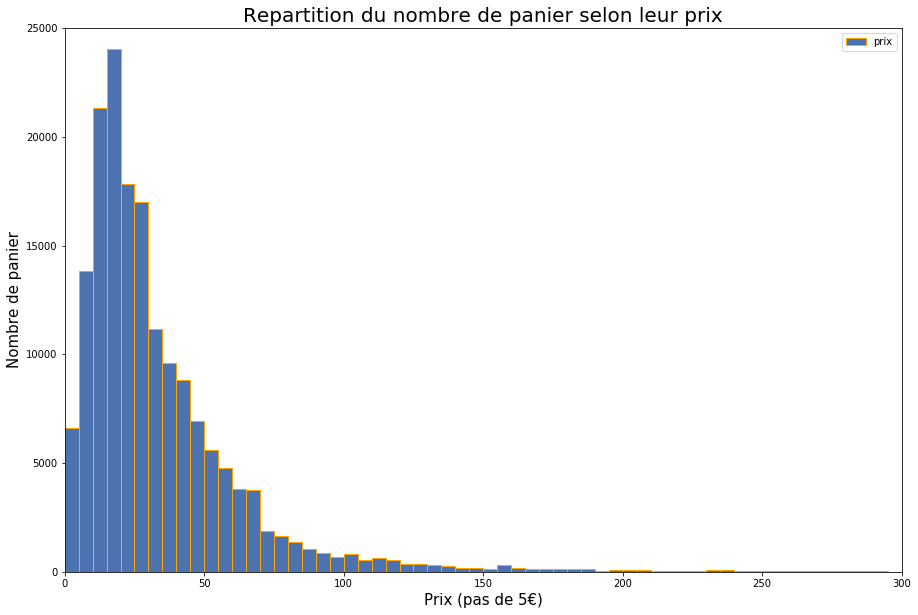

In [68]:
toutPanierAnnee['price'].plot.hist(figsize=(15,10),bins = range(0,300,5) , edgecolor = 'orange', label='prix')
plt.xlabel('Prix (pas de 5€)',fontsize=15)
plt.ylabel('Nombre de panier',fontsize=15)
plt.title('Repartition du nombre de panier selon leur prix',fontsize=20)
plt.axis([0, 300, 0, 25000])
plt.grid(False)
plt.legend()
plt.show()


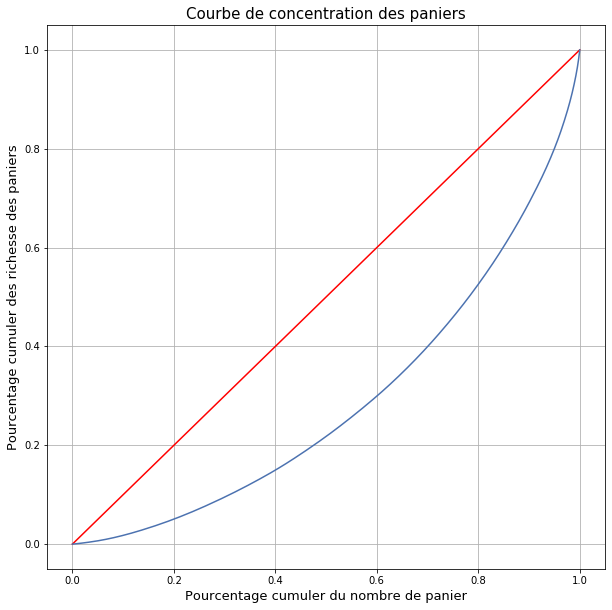

In [69]:
e = toutPanierAnnee.copy()
e = e.sort_values(by='price')
e = e.reset_index()

dep = e['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de concentration des paniers', fontsize=15)
plt.ylabel('Pourcentage cumuler des richesse des paniers', fontsize=13)
plt.xlabel('Pourcentage cumuler du nombre de panier', fontsize=13)
plt.grid(True)
plt.show()

In [70]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.42046210685900987

Encore une fois notre courbe de concentration concorde avec nos observation sur la repartition des paniers. Ces derniers sont beaucoup de paniers "pas chere" et quelque un sont "tres chere" ce qui destabilise la balance.

# Correlation

Dans cette partie nous regarderons s'il existe une correlation, un lien, entre les données

## Correlation: Sexes Catégories


In [71]:
corrSexCateg = tab_transactionsComplete[['sex','categ']].pivot_table(index='sex', columns='categ', aggfunc=len)
c = corrSexCateg.copy()

tx = tab_transactionsComplete['sex'].value_counts()
ty = tab_transactionsComplete['categ'].value_counts()

c.loc[:,'Total'] = tx
c.loc['total',:] = ty
c.loc['total','Total'] = len(tab_transactionsComplete)

c

categ,0.0,1.0,2.0,Total
sex,,,,
f,103846.0,55469.0,8260.0,167575.0
m,105683.0,54266.0,9292.0,169241.0
total,209529.0,109735.0,17552.0,336816.0


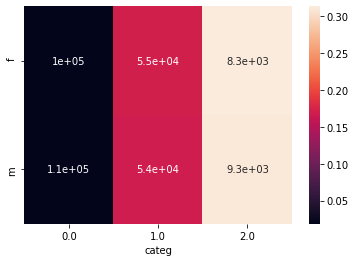

In [72]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(tab_transactionsComplete)
indep = tx.dot(ty.T) / n

mesure = (corrSexCateg-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=corrSexCateg)
sns.set(rc={'figure.figsize':(13,10)})
plt.show()

## Correlation: Ages et montant total d'achat

In [73]:
tdf_CAgeAchatTotal = pd.pivot_table(tab_transactionsComplete,values='price', index=['client_id','age'], aggfunc='sum')
tdf_CAgeAchatTotal = tdf_CAgeAchatTotal.reset_index()

tdf_CAgeAchatTotal_mean = pd.pivot_table(tdf_CAgeAchatTotal, index=['age'], values="price",aggfunc='mean')
tdf_CAgeAchatTotal_mean = tdf_CAgeAchatTotal_mean.reset_index()
tdf_CAgeAchatTotal_mean.head()

,age,price
0,16,675.945034
1,17,610.078552
2,18,620.142530
3,19,679.051840
4,20,589.048286


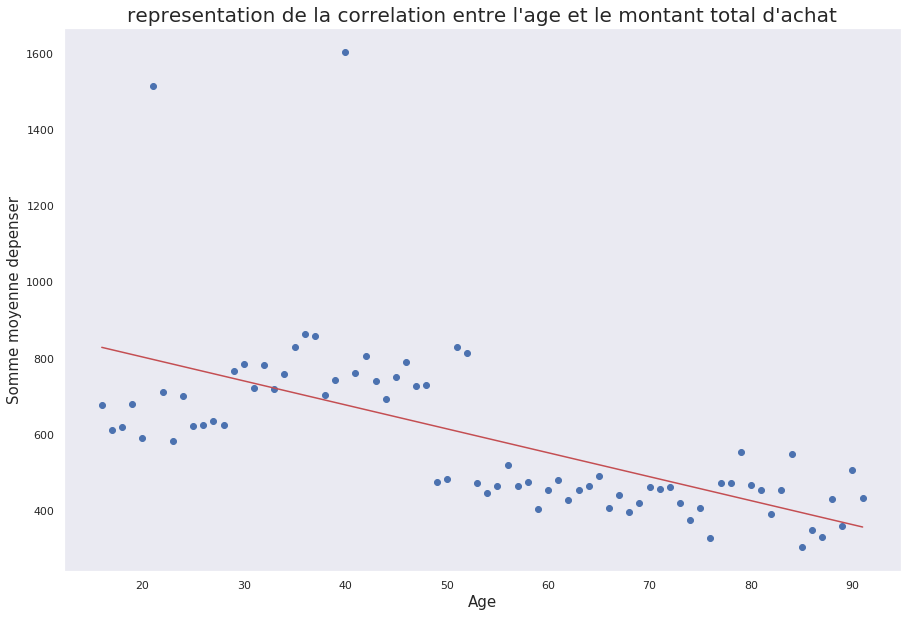

In [74]:

X = tdf_CAgeAchatTotal_mean['age']
Y = tdf_CAgeAchatTotal_mean['price']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Age',fontsize=15)
plt.ylabel("Somme moyenne depenser",fontsize=15)
plt.title("representation de la correlation entre l'age et le montant total d'achat",fontsize=20)
plt.grid(False)
plt.show()


In [75]:
st.pearsonr(tdf_CAgeAchatTotal_mean['age'], tdf_CAgeAchatTotal_mean['price'])[0]

-0.6255483384509141

In [76]:
np.cov(tdf_CAgeAchatTotal_mean['age'], tdf_CAgeAchatTotal_mean['price'],ddof=0)[1,0]

-3027.1534911393555

On peut donc grace a la droite de regression et au coef de pearson voire qu'il y a un correlation entre l'age et le montant total des achats

## Correlation: Age et fréquence d'achat

In [77]:
tdf_1 = pd.pivot_table(tab_transactionsComplete,values="session_id", index=['age',tab_transactionsComplete.date.dt.month], aggfunc='count')

tdf_1 = tdf_1.reset_index()

#Nombre moyen d'article par client
tdf_2 = pd.pivot_table(tdf_1, index=['age'], values="session_id",aggfunc='mean')
tdf_2 = tdf_2.reset_index()

In [78]:
corTailleClasse = 5
corGroupes = []



corTrancheAge = np.arange(15,100,corTailleClasse)

for ind, tr in enumerate(corTrancheAge):
        a = 0
        a = tdf_2[(tdf_2['age'] >= tr) & (tdf_2['age'] < tr+corTailleClasse)]['session_id'].sum()
        g={
            'age':tr,
            'Nombre achat moyen par mois':a}
        corGroupes.append(g)

corGroupes = pd.DataFrame(corGroupes)
corGroupes = corGroupes[:-1]

corGroupes = corGroupes[['age', 'Nombre achat moyen par mois']]


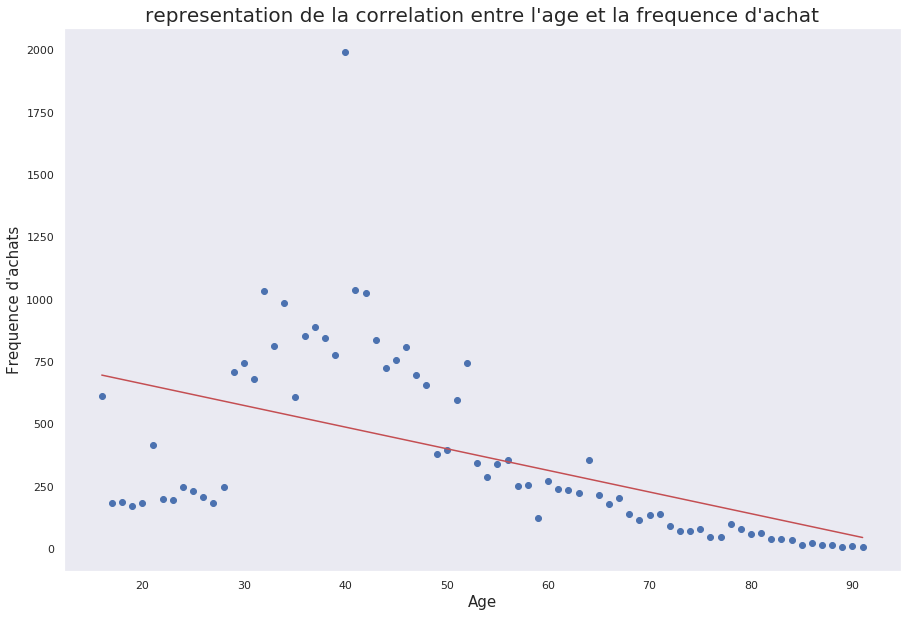

In [79]:
# X= corGroupes['age']
# Y= corGroupes['Nombre achat moyen par mois']

X = tdf_2['age']
Y = tdf_2['session_id']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Age',fontsize=15)
plt.ylabel("Frequence d'achats",fontsize=15)
plt.title("representation de la correlation entre l'age et la frequence d'achat",fontsize=20)
plt.grid(False)
plt.show()


In [80]:
st.pearsonr(corGroupes['age'], corGroupes['Nombre achat moyen par mois'])[0]

-0.5713184766808359

In [81]:
np.cov(corGroupes['age'], corGroupes['Nombre achat moyen par mois'],ddof=0)[1,0]

-21415.703125

On peut voire qu'il y a une correlation entre l'age des client et leur frequence d'achat

## Correlation: Age et nombre de produits moyen acheté


In [82]:
#regroupe le nb d'article par session
tdf_CAgePanierMoy = pd.pivot_table(tab_transactionsComplete, values='id_prod',index=['client_id','age','session_id'], aggfunc='count')
tdf_CAgePanierMoy = tdf_CAgePanierMoy.reset_index()

#Nombre moyen d'article par client
tdf_CAgePanierMoy = pd.pivot_table(tdf_CAgePanierMoy,index=['age'],values="id_prod",aggfunc='mean')
tdf_CAgePanierMoy = tdf_CAgePanierMoy.reset_index()
tdf_CAgePanierMoy.columns = ['age','nb_prod']
tdf_CAgePanierMoy.head()

,age,nb_prod
0,16,1.757054
1,17,1.724901
2,18,1.742947
3,19,1.732310
4,20,1.843220


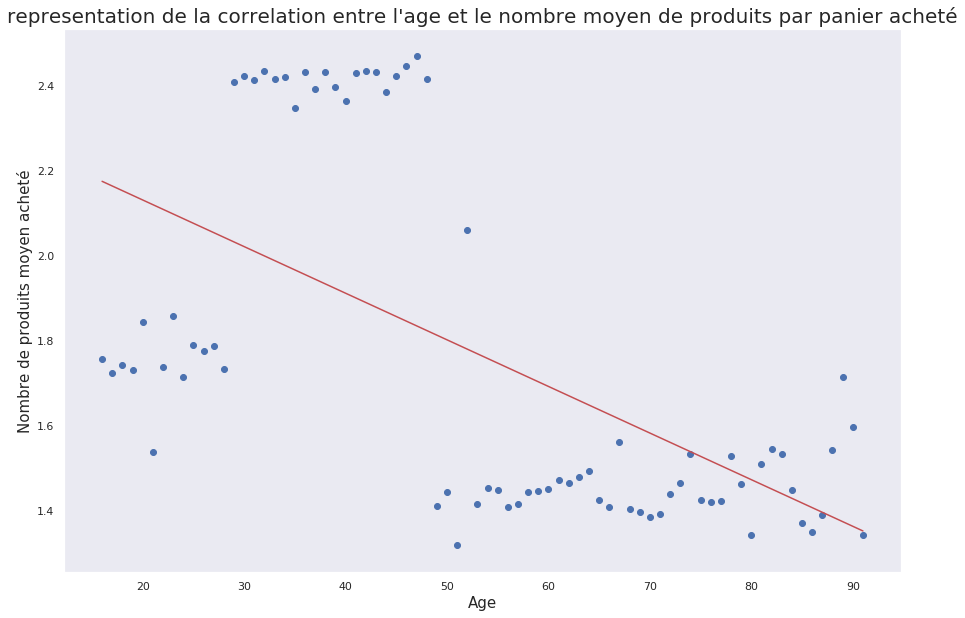

In [83]:

X = tdf_CAgePanierMoy['age']
Y = tdf_CAgePanierMoy['nb_prod']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Age',fontsize=15)
plt.ylabel("Nombre de produits moyen acheté",fontsize=15)
plt.title("representation de la correlation entre l'age et le nombre moyen de produits par panier acheté",fontsize=20)
plt.grid(False)
plt.show()


In [84]:
st.pearsonr(tdf_CAgePanierMoy['age'], tdf_CAgePanierMoy['nb_prod'])[0]

-0.5808288928810568

In [85]:
np.cov(tdf_CAgePanierMoy['age'], tdf_CAgePanierMoy['nb_prod'],ddof=0)[1,0]

-5.271530370552438

Encore une fois en prenant le coef et la representation graph on peut voire qu'il y a une correlation entre les deux variable

## Correlation: Age et categories acheté

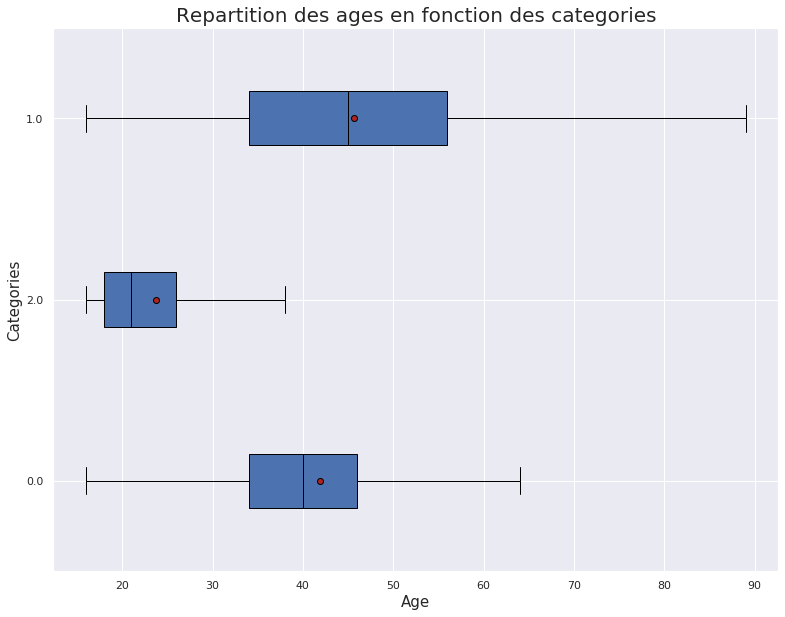

In [86]:
X = 'categ'
Y = 'age'

sous_echantillon = tab_transactionsComplete[['age','categ']]


modalites = sous_echantillon[X].unique()
groupesCorr = []
for m in modalites:
    groupesCorr.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupesCorr, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Repartition des ages en fonction des categories', fontsize=20)
plt.ylabel('Categories', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.show()

In [87]:
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = tab_transactionsComplete[['age','categ']]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11884029228184805

Ici notre eta², nous donne un chiffre plutot faible et au vue de ce dernier et des graph il semblerai qu'il existe une faible correlation entre l'age et la categorie acheter par les clients
